<h1>Research articles project</h1>

# Importing necessary modules

In [191]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data preparation

## Importing data and setting columns names

In [192]:
data = pd.read_csv("drive/MyDrive/ML_projects/Articles_NLP/articles_data/train.csv", header=0)

In [193]:
data.drop('ID', inplace=True, axis=1)

data.columns = ['title', 'abstract', 'comp_sci', 'physics', 'maths', 'stats', 'quan_biol', 'quan_fin']

## Dummy variables to single label

In [194]:
data['label'] = data.iloc[:, 2:].idxmax(axis=1)

In [195]:
data.head()

,title,abstract,comp_sci,physics,maths,stats,quan_biol,quan_fin,label
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,comp_sci
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,comp_sci
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,maths
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,maths
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,comp_sci


## Detecting double labels

In [196]:
data['calc'] = data.comp_sci + data.physics + data.maths + data.stats + data.quan_biol + data.quan_fin

In [197]:
data.groupby('calc').count()

,title,abstract,comp_sci,physics,maths,stats,quan_biol,quan_fin,label
calc,,,,,,,,,
1,15928,15928,15928,15928,15928,15928,15928,15928,15928
2,4793,4793,4793,4793,4793,4793,4793,4793,4793
3,251,251,251,251,251,251,251,251,251


## Separating single label observations

In [199]:
df = data.loc[data.calc == 1].loc[:, ['title', 'abstract', 'label']].reset_index(drop=True)

In [200]:
df.head()

,title,abstract,label
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,comp_sci
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,comp_sci
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,maths
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,maths
4,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,maths


# EDA

## Class distribution

Text(0.5, 1.0, 'Distribution of labels in the datasertt')

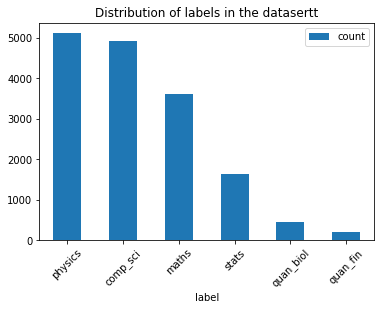

In [225]:
df.groupby("label").count().iloc[:, [0]].rename(columns={'title':'count'}).sort_values(by='count', ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Distribution of labels in the datasertt")

## Average abstract word count per label

In [226]:
df['wordcount'] = df.abstract.apply(lambda x: len(x.split()))

In [227]:
df.abstract.apply(lambda x: len(x.split())).mean()

146.89565544952285

Text(0.5, 1.0, 'average word count per label')

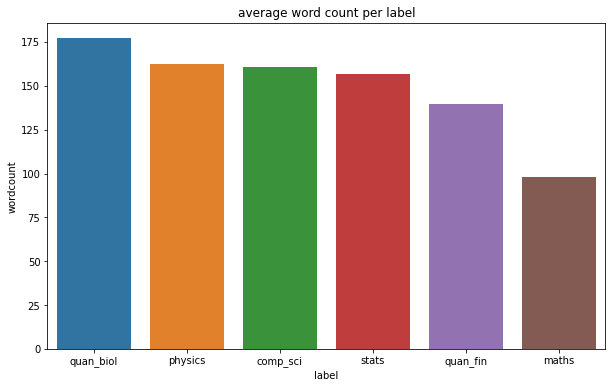

In [204]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.groupby('label').mean().reset_index().sort_values(by='wordcount', ascending=False), x='label', y='wordcount')
plt.title('average word count per label')


In [205]:
df.groupby("label").mean().wordcount.max()

177.10609480812641

In [206]:
df.reset_index().groupby('label').mean()

,index,wordcount
label,,
comp_sci,7994.721996,160.852546
maths,7960.491413,98.218006
physics,7979.508789,162.313867
quan_biol,7573.257336,177.106095
quan_fin,8051.885167,139.655502
stats,7920.713325,156.911980


In [207]:
df.groupby('label').mean().reset_index()

,label,wordcount
0,comp_sci,160.852546
1,maths,98.218006
2,physics,162.313867
3,quan_biol,177.106095
4,quan_fin,139.655502
5,stats,156.911980


## Shortest abstracts

In [232]:
df.sort_values(by='wordcount').head(20)

,title,abstract,label,label_en,wordcount
12448,Are theoretical results 'Results'?,Yes.\n,quan_biol,3,1
2998,Inner Cohomology of the General Linear Group,The main theorem is incorrectly stated.\n,maths,1,6
8345,Deep Neural Networks - A Brief History,Introduction to deep neural networks and the...,comp_sci,0,8
4686,The CCI30 Index,We describe the design of the CCI30 cryptocu...,quan_fin,5,9
5236,Calculating the closed ordinal Ramsey number $...,"We show that $R^{cl}(\omega\cdot 2,3)^2$ is ...",maths,1,10
7946,Some divisibility properties of binomial coeff...,"In this paper, we gave some properties of bi...",maths,1,10
2356,Motives of derived equivalent K3 surfaces,We observe that derived equivalent K3 surfac...,maths,1,11
12771,Gaschütz Lemma for Compact Groups,We prove the Gaschütz Lemma holds for all me...,maths,1,11
12528,A Fourier transform for the quantum Toda lattice,We introduce an algebraic Fourier transform ...,maths,1,11
13366,Motivic rational homotopy type,In this paper we introduce and study motives...,maths,1,12


The two shortest abstracts do not make any sense because they are too short. Let's delete them

In [233]:
df.drop([12448, 2998], axis=0, inplace=True)

In [234]:
del df['wordcount']

## Abstract mono-grams in general and per label

### General

In [209]:
dict_words = Counter(" ".join(df["abstract"].apply(lambda x: x.lower())).split())

words = dict(sorted(dict_words.items(), key=lambda item: item[1], reverse=True))

In [210]:
sw = stopwords.words('english')

In [211]:
a = 0
l = {}
for k, v in zip(words.keys(), words.values()):
  if k in sw:
    continue
  else:
    l[k] = v
    a += 1

In [212]:
l

{'model': 5793,
 'show': 5619,
 'using': 5545,
 'data': 5118,
 'results': 4860,
 'also': 4754,
 'two': 4271,
 'based': 3922,
 'method': 3695,
 'new': 3564,
 'study': 3362,
 'different': 3278,
 'one': 3096,
 'used': 3081,
 'system': 3052,
 'approach': 3047,
 'problem': 3045,
 'present': 2982,
 'proposed': 2932,
 'paper': 2870,
 'number': 2834,
 'time': 2781,
 'learning': 2707,
 'network': 2666,
 'use': 2544,
 'algorithm': 2537,
 'models': 2514,
 'large': 2457,
 'propose': 2383,
 'analysis': 2284,
 'first': 2202,
 'paper,': 2197,
 'well': 2155,
 'order': 2128,
 'performance': 2116,
 'energy': 2081,
 'find': 2043,
 'provide': 2040,
 'however,': 2022,
 'systems': 2013,
 'field': 2007,
 'set': 2005,
 'methods': 1986,
 'information': 1962,
 'high': 1923,
 'function': 1857,
 'properties': 1855,
 'demonstrate': 1834,
 'given': 1797,
 'quantum': 1787,
 'structure': 1776,
 'may': 1766,
 'many': 1712,
 'work': 1710,
 'neural': 1682,
 'magnetic': 1654,
 'space': 1648,
 'prove': 1640,
 'several': 1

### Per label (top 10)

In [213]:
df.head()

,title,abstract,label
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,comp_sci
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,comp_sci
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,maths
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,maths
4,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,maths


In [214]:
for l in df.label.unique():
  dict_words = Counter(" ".join(df.loc[df.label == l].loc[:,"abstract"].apply(lambda x: x.lower())).split())
  words = dict(sorted(dict_words.items(), key=lambda item: item[1], reverse=True))

  counter = 0
  dictionary = {}
  for k, v in zip(words.keys(), words.values()):
    if counter > 10:
      break
    if k in sw:
      continue
    else:
      dictionary[k] = v
      counter += 1

  print(str(l) + " " + str(dictionary))

comp_sci {'data': 2412, 'using': 2146, 'model': 2029, 'show': 1945, 'based': 1827, 'network': 1716, 'results': 1713, 'proposed': 1681, 'problem': 1584, 'learning': 1582, 'algorithm': 1571}
maths {'show': 1212, 'prove': 1144, 'also': 990, 'study': 899, 'results': 834, 'group': 779, 'paper': 709, 'two': 672, 'finite': 669, 'problem': 630, 'space': 617}
physics {'using': 1910, 'model': 1736, 'show': 1591, 'two': 1574, 'also': 1560, 'magnetic': 1559, 'results': 1542, 'energy': 1447, 'field': 1322, 'quantum': 1282, 'phase': 1271}
quan_biol {'model': 304, 'network': 199, 'using': 167, 'show': 162, 'results': 161, 'data': 160, 'networks': 155, 'two': 155, 'different': 154, 'neural': 143, 'also': 139}
stats {'data': 1322, 'model': 1166, 'learning': 945, 'using': 766, 'method': 739, 'proposed': 657, 'models': 647, 'show': 644, 'based': 594, 'approach': 584, 'methods': 573}
quan_fin {'model': 172, 'market': 145, 'price': 101, 'risk': 82, 'results': 79, 'data': 69, 'time': 66, 'show': 65, 'optima

## Class based TF-IDF

source: https://towardsdatascience.com/creating-a-class-based-tf-idf-with-scikit-learn-caea7b15b858 



In [215]:
import scipy.sparse as sp

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [216]:
df['label_en'] = pd.factorize(df['label'])[0]

label_dict = dict(df.groupby('label').mean().reset_index()[['label_en', 'label']].values)

In [217]:
label_dict

{0: 'comp_sci',
 1: 'maths',
 2: 'physics',
 3: 'quan_biol',
 4: 'stats',
 5: 'quan_fin'}

In [218]:
class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        """Learn the idf vector (global term weights) """
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        """Transform a count-based matrix to c-TF-IDF """
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X

In [219]:
docs = pd.DataFrame({'Document': df.abstract, 'Class': df.label_en})
docs_per_class = docs.groupby(['Class'], as_index=False).agg({'Document': ' '.join})

# Create c-TF-IDF
count = CountVectorizer().fit_transform(docs_per_class.Document)
ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(docs))

In [223]:
count_vectorizer = CountVectorizer().fit(docs_per_class.Document)
count = count_vectorizer.transform(docs_per_class.Document)
words = count_vectorizer.get_feature_names()

# Extract top 10 words per class
ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(docs)).toarray()
words_per_class = {label_dict[label]: [words[index] for index in np.flip(ctfidf[label].argsort()[-10:], axis=0)] 
                   for label in docs_per_class.Class}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [224]:
pd.DataFrame(words_per_class).T
# 0 is the most relevant word to the class according to cTF-IDF results

,0,1,2,3,4,5,6,7,8,9
comp_sci,network,algorithm,learning,based,performance,problem,paper,proposed,information,approach
maths,mathbb,prove,mathcal,group,algebra,finite,if,groups,spaces,some
physics,magnetic,spin,phase,field,energy,at,temperature,mass,quantum,density
quan_biol,brain,cell,cells,networks,species,protein,activity,dynamics,biological,population
stats,learning,data,models,methods,inference,bayesian,training,model,method,proposed
quan_fin,market,price,risk,volatility,portfolio,asset,stock,financial,prices,trading


It seems that all of the classes have accurate TF-IDF keywords. This can be an indicator for a further research on heuristic-based classification.

#Quick preprocessing and dataset export

In [242]:
df.sample(10)

,title,abstract,label,label_en
7636,Maximum entropy and population heterogeneity i...,Continuous cultures of mammalian cells are c...,quan_biol,3
15154,Zero sum partition into sets of the same order...,We will say that an Abelian group $\Gamma$ o...,maths,1
11065,Block-Diagonal and LT Codes for Distributed Co...,We propose two coded schemes for the distrib...,comp_sci,0
14311,Higher-degree Smoothness of Perturbations I,"In this paper and its sequels, we give an un...",maths,1
5111,Deep Text Classification Can be Fooled,"In this paper, we present an effective metho...",comp_sci,0
6903,K-Means Clustering using Tabu Search with Quan...,The Tabu Search (TS) metaheuristic has been ...,comp_sci,0
9576,Negative thermal expansion and metallophilicit...,We report the synthesis and structural chara...,physics,2
13413,On locally compact semitopological $0$-bisimpl...,We describe the structure of Hausdorff local...,maths,1
6370,A Language Hierarchy and Kitchens-Type Theorem...,We generalize the notion of self-similar gro...,maths,1
14171,Perturbations of self-adjoint operators in sem...,"In the paper, we prove an analogue of the Ka...",maths,1


In [238]:
def delete_br(text):
  text = text.replace("\n", "")
  return text

df.abstract = df.abstract.apply(delete_br)

In [249]:
!ls

drive  sample_data


In [251]:
df.to_csv("drive/MyDrive/ML_projects/Articles_NLP/train_data_1.csv")

# test data prep

In [252]:
test_df = pd.read_csv('drive/MyDrive/ML_projects/Articles_NLP/articles_data/test.csv')

In [253]:
test_df

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...
...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...
